# Wine Quality Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

rs = 47

In [4]:
df = pd.read_csv("/kaggle/input/wine-quality-dataset-balanced-classification/wine_data.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


## About the data

The data have 21,000 entries and 12 variables, with no missing values 

In [6]:
#Check for duplicate values 
print(f'Number of duplicate values in the data: {df.duplicated().sum()}')

Number of duplicate values in the data: 6060


In [7]:
#Remove duplicates 
df.drop_duplicates(inplace = True)
print(f'Number of duplicate values in the data: {df.duplicated().sum()}')

Number of duplicate values in the data: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14940 entries, 0 to 20994
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         14940 non-null  float64
 1   volatile_acidity      14940 non-null  float64
 2   citric_acid           14940 non-null  float64
 3   residual_sugar        14940 non-null  float64
 4   chlorides             14940 non-null  float64
 5   free_sulfur_dioxide   14940 non-null  float64
 6   total_sulfur_dioxide  14940 non-null  float64
 7   density               14940 non-null  float64
 8   pH                    14940 non-null  float64
 9   sulphates             14940 non-null  float64
 10  alcohol               14940 non-null  float64
 11  quality               14940 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.5 MB


In [9]:
#Summary of the data
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000
mean,9.619956,0.746201,0.762662,29.421767,0.190994,122.365000,220.594525,1.008847,3.164686,0.988583,11.260888,5.973695
std,2.440643,0.369823,0.392536,19.674421,0.126539,78.780757,102.328384,0.012278,0.171607,0.414441,1.184349,1.908031
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.300000,0.370000,0.370000,6.500000,0.059000,38.000000,137.000000,0.996300,3.040000,0.580000,10.400000,4.000000
50%,9.700000,0.785000,0.820000,36.000000,0.192000,136.550000,228.000000,1.010970,3.150000,1.020000,11.300000,6.000000
75%,11.600000,1.060000,1.100000,46.200000,0.290000,190.900000,307.000000,1.019230,3.280000,1.340000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
df['quality'].value_counts(normalize = True)

quality
5    0.166934
6    0.166332
7    0.150736
4    0.133735
8    0.130388
3    0.126506
9    0.125368
Name: proportion, dtype: float64

The data is fairly balanced across the wine quality classes

## Data Analysis

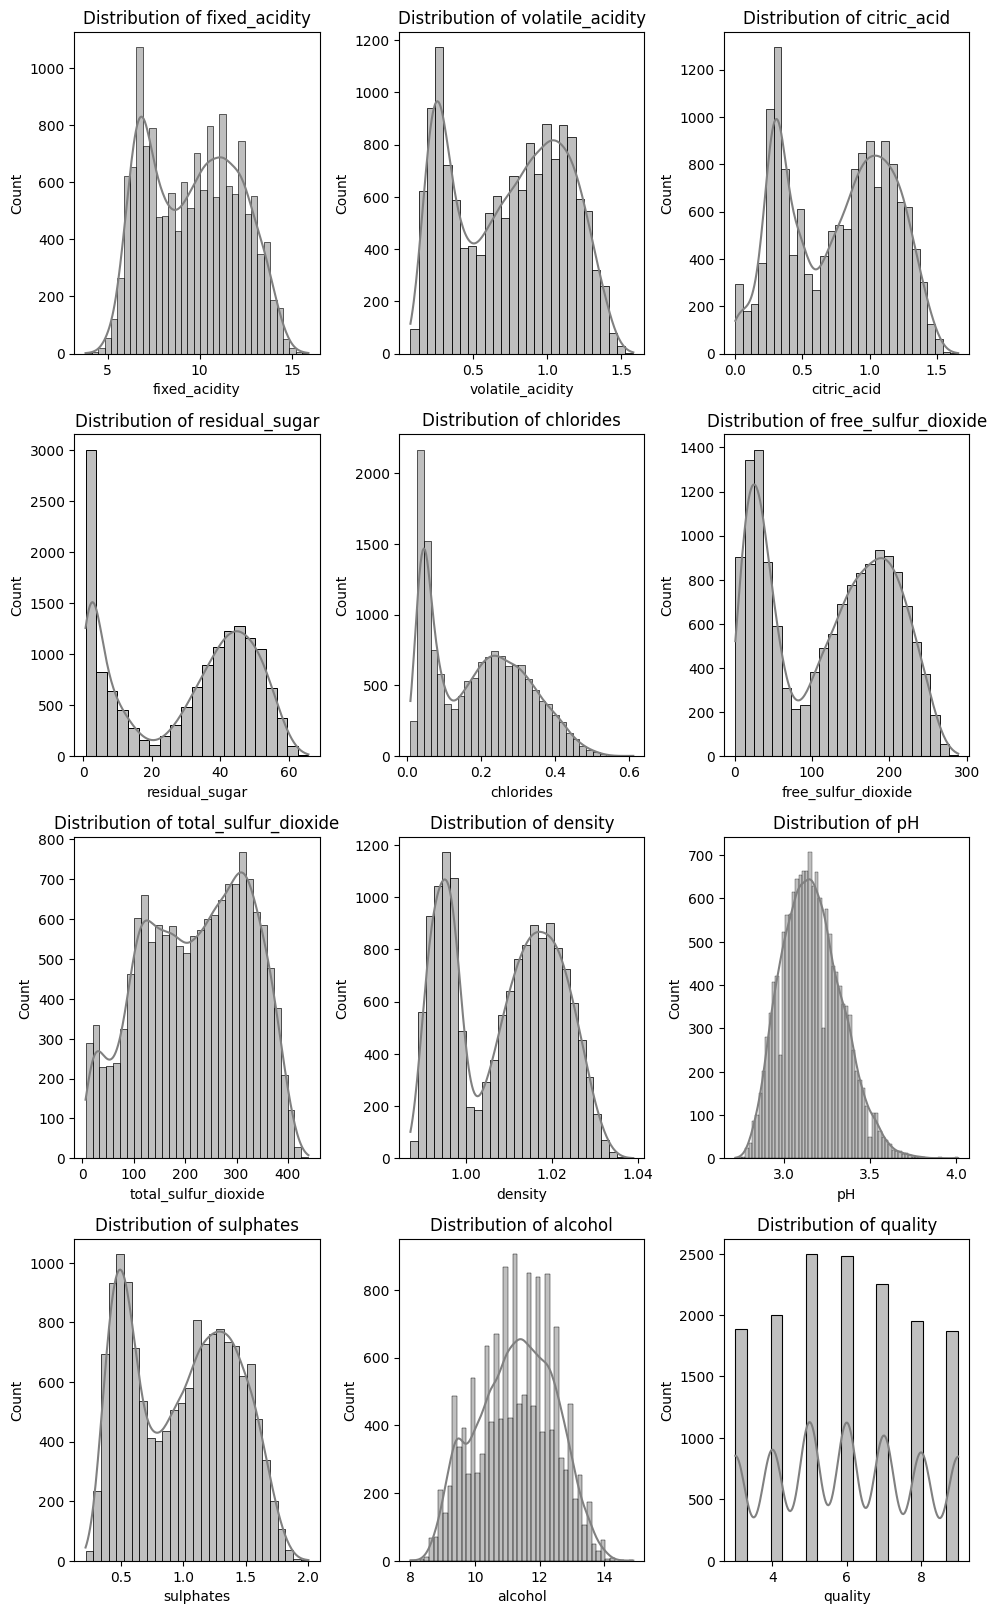

In [11]:
# Distribution of the variables
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

num_cols = df.select_dtypes(include = ['number']).columns.tolist()
n_col = 3
n_row = len(num_cols) + 1 // n_col

plt.figure(figsize = (10, 4 * n_row))

for i, col in enumerate(num_cols):
    plt.subplot(n_row, n_col, i + 1)
    sns.histplot(df[col], kde = True, color = 'grey')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

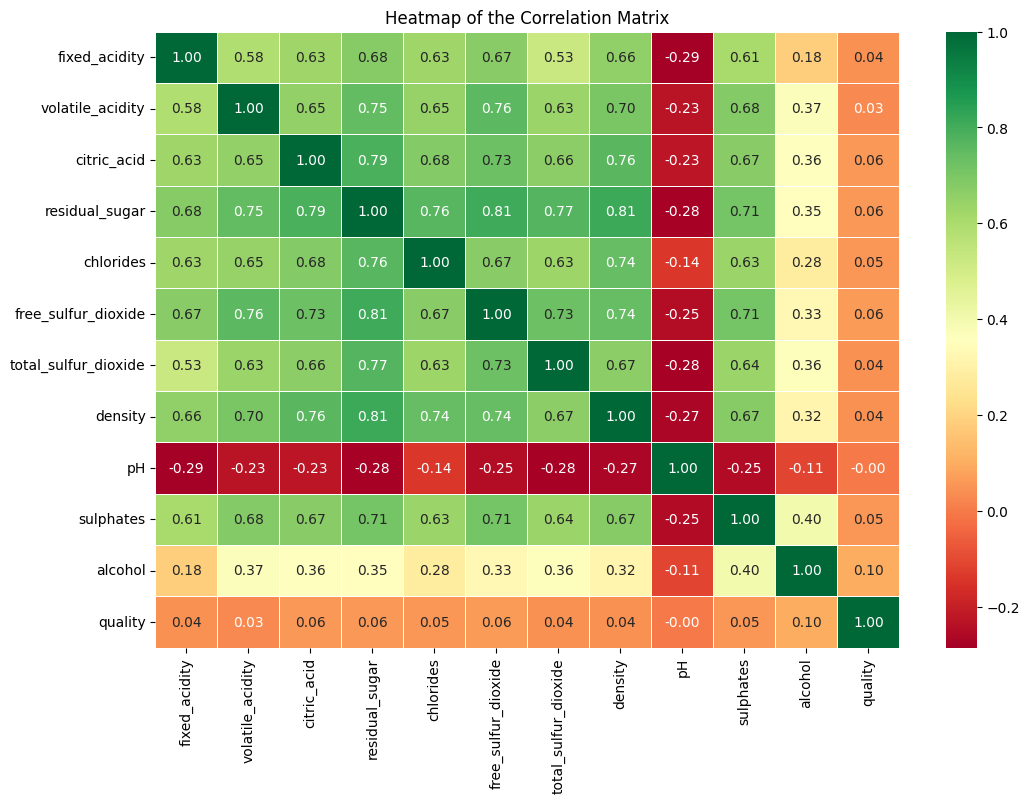

In [12]:
corr_matrix = df.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', linewidth = 0.5, cmap = 'RdYlGn')
plt.title('Heatmap of the Correlation Matrix')
plt.show()

## Feature Engineering 

In [13]:
# Make a copy of the data
data = df.copy()

Target variable 'quality' have 7 classes, although multiclass classification can work for this data but for more interpretability, I used 6 as the threshold to group the wine quality class into Good(1) and Bad(0)

In [14]:
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20985,10.3,1.080,0.53,50.80,0.290,84.2,345.0,1.00356,3.17,1.38,13.8,1
20987,11.4,0.900,0.64,51.20,0.417,197.1,241.8,1.01707,3.31,1.33,11.3,1
20988,11.8,1.100,0.84,46.50,0.255,198.4,130.0,1.01697,3.11,0.87,10.8,1
20993,13.0,0.580,1.22,52.80,0.247,93.0,190.7,1.01922,3.38,1.24,9.9,1


In [15]:
data['quality'].value_counts(normalize = True)

quality
1    0.572825
0    0.427175
Name: proportion, dtype: float64

The classes are fairly balanced even after reducing the quality variable to binary variable

In [ ]:
plt.figure(figsize = (12, 8))

sns.pairplot(data, hue = 'quality')
plt.show()

In [16]:
X = data.drop(['quality'], axis = 1)
y = data['quality']

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
print(f'Shape of Features: {X.shape}')
print(f'Shape of Target: {y.shape}')

Shape of Features: (14940, 11)
Shape of Target: (14940,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = rs)

## Ensemble Learning
### 1. Random Forest Classifier

In [20]:
param_grid = {'max_depth': [None, 10, 20],
              'n_estimators': [5, 10, 15],
             'max_features': [None, 'sqrt', 'log2']}

rf_model = RandomForestClassifier(random_state = rs, n_jobs = -1)

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=47),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy')

In [22]:
print(f'The best parameters: {grid_search.best_params_}')
print(f'The best score: {grid_search.best_score_:.2f}')
print(f'The best estimator: {grid_search.best_estimator_}')

The best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10}
The best score: 0.61
The best estimator: RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1,
                       random_state=47)


In [23]:
best_rf_model = grid_search.best_estimator_
print(f"Random Forest's accuracy on Train data: {best_rf_model.score(X_train, y_train):.2f}")
print(f"Random Forest's accuracy on Test data: {best_rf_model.score(X_test, y_test):.2f}")

Random Forest's accuracy on Train data: 0.74
Random Forest's accuracy on Test data: 0.61


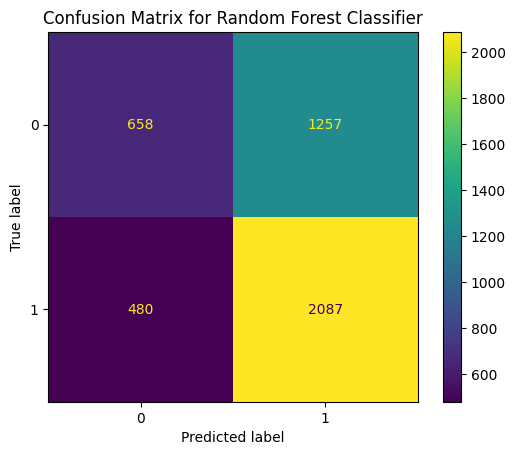

In [24]:
ypred = best_rf_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, ypred)

cmd = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = best_rf_model.classes_)
cmd.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### 2. Gradient Boosting Classifier

In [26]:
param_grid = {'n_estimators': [50, 100],
             'max_features': [None, 'sqrt', 'log2'],
             'max_depth': [5, 10]}

gbc = GradientBoostingClassifier(random_state = rs)
grid_search2 = GridSearchCV(estimator = gbc, param_grid = param_grid, scoring = 'accuracy', cv = 3)

In [27]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=47),
             param_grid={'max_depth': [5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [28]:
print(f'The best parameters: {grid_search2.best_params_}')
print(f'The best score: {grid_search2.best_score_:.2f}')
print(f'The best estimator: {grid_search2.best_estimator_}')

The best parameters: {'max_depth': 5, 'max_features': None, 'n_estimators': 50}
The best score: 0.61
The best estimator: GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=47)


In [29]:
best_gbc = grid_search2.best_estimator_
print(f"GBC model's accuracy on the Train data: {best_gbc.score(X_train, y_train):.2f}")
print(f"GBC model's accuracy on the Test data: {best_gbc.score(X_test, y_test):.2f}")

GBC model's accuracy on the Train data: 0.70
GBC model's accuracy on the Test data: 0.62


## Neural Network

In [31]:
model = Sequential([
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 64, validation_split = 0.3)

Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5231 - loss: 0.7167 - val_accuracy: 0.5615 - val_loss: 0.6634
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5799 - loss: 0.6548 - val_accuracy: 0.5921 - val_loss: 0.6468
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5922 - loss: 0.6457 - val_accuracy: 0.5943 - val_loss: 0.6442
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6009 - loss: 0.6367 - val_accuracy: 0.6004 - val_loss: 0.6386
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5987 - loss: 0.6409 - val_accuracy: 0.5991 - val_loss: 0.6407
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5967 - loss: 0.6390 - val_accuracy: 0.6020 - val_loss: 0.6368
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5973 - loss: 0.6394 - val_accuracy: 0.6036 - val_loss: 0.6368
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6036 - loss: 0.6364 - val_accuracy: 0.

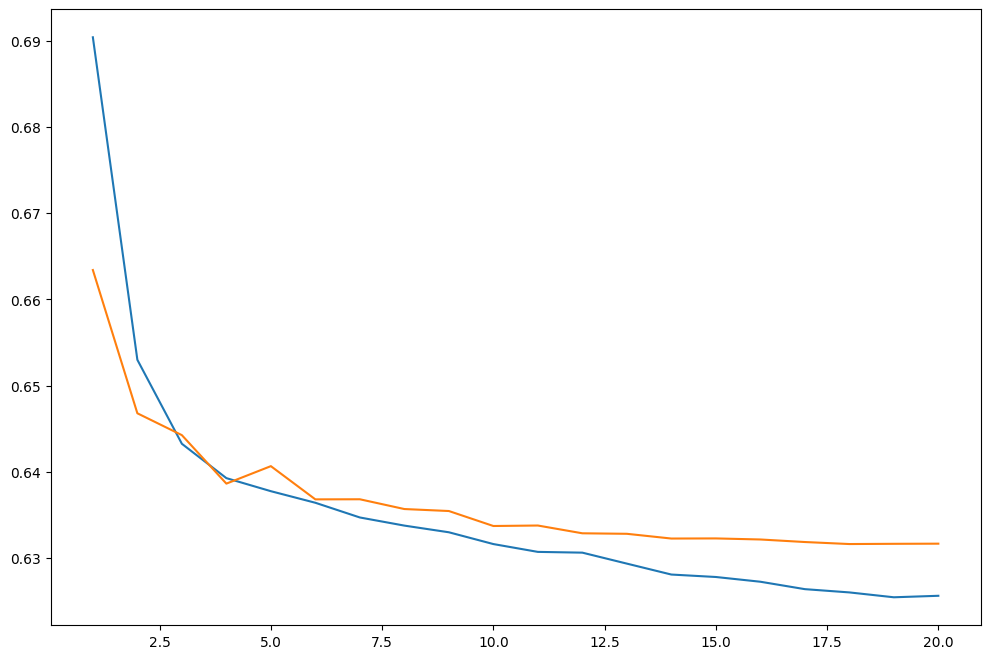

In [36]:
epochs = range(1, 21)

plt.figure(figsize = (12, 8))
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.show()

In [37]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6088 - loss: 0.6334
Test Accuracy: 0.61


In [38]:
y_pred3 = (model.predict(X_test) > 0.5).astype('int')
y_pred3

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

The neural network and the ensemble methods have similar performance on this data set. The neural network can be further optimized to give better performance 